## **Regression Analysis of Distance and Minutes Sedentary over the month of June**

In [3]:
import numpy as np
import csv
import sys
import plotly.express as pxl
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [4]:
filename = 'June.csv'

In [26]:
fields = []
rows = []

with open('June.csv', 'r') as csvfile:
    csvfile = csvfile.read().split('\n')
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)
data = pd.DataFrame(rows)

In [27]:
data_h = data.iloc[0]
data_b = data.iloc[1:31]
data = np.array(data_b)
data = pd.DataFrame(data, columns=data_h)
data = data.replace(',','', regex=True)

In [28]:
data.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-06-01,2648,11205,6.6,18,771,255,22,24,1331
1,2020-06-02,3118,13109,8.07,38,602,227,43,74,1807
2,2020-06-03,2794,12708,8.36,37,934,262,15,47,1531
3,2020-06-04,3221,17513,8.62,10,848,275,57,72,2009
4,2020-06-05,2789,7922,3.53,7,761,343,14,21,1519


In [29]:
x1 = data['Distance'].astype(str).astype(float)
y = data['Minutes Sedentary'].astype(str).astype(int)

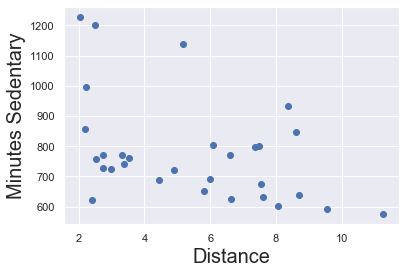

In [30]:
plt.scatter(x1,y)
plt.xlabel('Distance',fontsize=20)
plt.ylabel('Minutes Sedentary',fontsize=20)
plt.show()

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Minutes Sedentary   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     6.593
Date:                Tue, 28 Jul 2020   Prob (F-statistic):             0.0159
Time:                        20:46:06   Log-Likelihood:                -193.14
No. Observations:                  30   AIC:                             390.3
Df Residuals:                      28   BIC:                             393.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        931.7471     66.364     14.040      0.000     795.807    1067.688
Distance     -28.3484     11.041     -2.568      0.016     -50.964      -5.733
==============================================================================
Omnibus:                        8.227   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.031
Skew:                           1.163   Prob(JB):                       0.0297
Kurtosis:                       3.463   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

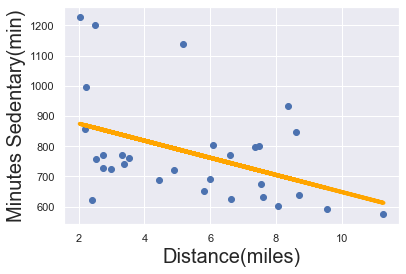

In [420]:
plt.scatter(x1,y)
yhat = x1*-28.3484+931.7471
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Distance(miles)', fontsize = 20)
plt.ylabel('Minutes Sedentary(min)', fontsize = 20)
plt.show()

In [422]:
#transform the inputs into a matrix (2D object)
x_matrix = x1.values.reshape(-1,1)
#regression itself
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [423]:
#intercept
reg.intercept_

931.747055558918

In [427]:
#r-squared
reg.score(x_matrix,y)

0.19058539973246857

In [428]:
#coefficent
reg.coef_

array([-28.3483573])

In [426]:
#prediction for sedentary minutes if 8 miles are ran
reg.predict([[8]])

array([704.96019717])